## MultiAgent Systems (Self-Interested agents)
### 3 players Infinite Prisoner’s Dilemma (3p-IPD) game
> - For the 3 players Prisoner’s Dilemma game (3p-PD), the dominant defection strategy relies on the fact that it is a one shot game with no future.

> - On the other hand, for the 3 players Infinite Prisoner’s Dilemma game (3p-IPD) whereby the three players may meet each other again.  This encourages the players to develop strategies based on the previous game interactions.  Thus, a player’s current move may affect how his/her opponents behave in the future and affect the player’s future payoffs.

> - This apparently helps to remove the single dominant strategy of defection because the players can use more complex strategies dependent on game history to maximise the payoffs they will receive.

> - The players Pay-offs matrix is :
![alt text](https://github.com/samaujs/Artificial-Intelligence/blob/main/3PD/Pay-offs%20Matrix.png?raw=true)

### Definitions and Observations :

> - Let D and C to represent Defection (1) and Cooperation (0) respectively
> - Assume a symmetric game matrix, XCD could be written as XDC, where X may be C or D
> - U(DCC) > U(CCC) > U(DCD) > U(CCD) > U(DDD) > U(CDD)
> - D is the dominant strategy for any player

### The common complex player strategies are :

> 1. **NicePlayer** : Always cooperate.
> 2. **NastyPlayer** : Always defect.
> 3. **RandomPlayer** : Cannot make up one’s mind, cooperates and defects randomly.
> 4. **TolerantPlayer** : Only defects if at least half of the other players' actions have been defects.
> 5. **FreakyPlayer** : Determines at the start of the match randomly to be nice or nasty at all times.
> 6. **T4TPlayer** : Picks a random opponent at each play and uses the 'tit-for-tat' strategy against them.

### New proposed player strategy with the following characteristics :
> 1. **Play nice** : Always be nice and starts with cooperation.
> 2. **Fast to anger** : Plays immediate defection when one of its two opponents plays defection.
> 3. **Forgiving** : Does not hold grudges and seek for cooperation.
> 4. **Reconciliation** : After player defects, player checks predefined observation rounds from history and attempts to reconcile defections with future cooperations.  If both opponents want to cooperate during these observation rounds, player will play nice immediately with cooperation.  The player will also cooperate for at least one more round (configurable) to show good will of cooperation.
> 5. **Cunning** : Plays defection with attempt to take extra bit of payoff for rounds greater than 109 (last round if there are 110 rounds).

## Run the code :
```
> javac ThreePrisonersDilemma.java
> java ThreePrisonersDilemma
```

## References :<br>
>[1] Chapter 11 “An Introduction to MultiAgent Systems, second edition” by Micheal Woolridge, 2012<br>
>[2] Iterated symmetric three-player prisoner’s dilemma game by Essam El-Seidy and Karim.M. Soliman<br>
>[3] [Game Theory, Axelrod’s Tournament by Janet Chen, Su-I Lu and Dan Vekhter](https://cs.stanford.edu/people/eroberts/courses/soco/projects/1998-99/game-theory/axelrod.html)<br>
>[4] [The Three-Player Prisoner's Dilemma by Computer Science University of Chicago](https://www.classes.cs.uchicago.edu/archive/1998/fall/CS105/Project/node6.html)<br>
>[5] Reinforcement Learning: An Introduction second edition, by Richard S. Sutton and Andrew G. Barto, 2018.<br>

# Start of Program

In [ ]:
# Import common libraries
import os
import csv

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import random
import pprint
import copy

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True) # figsize=(3,4)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# plt.subplots_adjust(hspace = 0.5)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_NAME = "3PD"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_NAME)
RESULTS_DIR_PATH = IMAGES_PATH
# os.path.join(PROJECT_ROOT_DIR, "results", PROJECT_NAME)

os.makedirs(RESULTS_DIR_PATH, exist_ok=True)

def plot_scores_vs_tournaments(iteration_scores, save_file_name=None):
    """
    params:
    - iteration_scores: {
        Player_Type : [total scores for each tournament run (float)]
    }
    - save_file_name (str): name of file to save plot as; defaults to None (not saved)
    """
    plt.figure(figsize=(16, 8))

    for state_position in iteration_scores:
        plt.plot(iteration_scores[state_position])

    plt.legend(iteration_scores, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title('Total scores of each player in each tournament')
    plt.xlabel('Number of Tournaments')
    plt.ylabel('Player total scores')

    if save_file_name is not None:
        plt.savefig(RESULTS_DIR_PATH + '/' + save_file_name)

    plt.show()

In [ ]:
# Load data into totalScores
totalScores = pd.read_csv('./3PD_TotalScores_7Players.csv')
rankcounts = pd.read_csv('./3PD_RankCounts_7Players.csv')
totalScores

,Player_name,round_1,round_2,round_3,round_4,round_5,round_6,round_7,round_8,round_9,...,round_991,round_992,round_993,round_994,round_995,round_996,round_997,round_998,round_999,round_1000
0,NicePlayer,144.132202,154.738083,151.823944,150.359970,145.317352,157.200089,151.824127,161.341522,152.058502,...,152.604355,155.176071,161.419235,149.876526,151.950531,151.569794,148.147614,151.253159,152.441055,141.694901
1,NastyPlayer,138.648804,138.145172,135.901413,150.063110,140.241699,130.983276,145.612167,141.579315,129.870209,...,135.211304,138.913986,142.901886,130.457413,139.073578,135.576294,148.129745,141.454453,146.924988,146.526108
2,RandomPlayer,137.252151,130.065918,134.063995,126.906670,126.953819,150.207275,146.762665,140.059174,128.171417,...,116.165047,133.699936,140.729736,141.803146,139.472321,138.292114,126.823692,132.471771,142.306107,133.062332
3,TolerantPlayer,164.127594,163.972580,164.098206,169.765594,161.916061,167.601135,162.938477,162.989456,165.078995,...,164.785110,161.962387,161.554916,170.259827,156.836212,161.927628,167.640610,167.400375,159.349594,167.951752
4,FreakyPlayer,143.212280,148.906387,132.694244,144.387512,147.670776,128.660950,144.566071,150.425690,131.511551,...,151.400665,135.040283,151.059311,151.871414,123.811142,157.184784,148.260895,132.482529,139.628860,149.672073
5,T4TPlayer,163.335114,163.547058,162.762482,165.894928,158.734543,157.543167,170.117310,162.834198,160.714813,...,169.093079,157.023499,155.408142,161.244385,156.869995,164.943115,159.063873,165.062729,171.583160,161.855316
6,Au_JitSeah_Player,169.759979,174.588379,171.825974,166.017426,173.774597,170.043625,173.826843,172.622498,165.925354,...,167.082077,177.655243,177.704086,164.127640,162.435181,171.803833,177.950302,162.003082,161.171463,177.530289


In [ ]:
totalScores_T = totalScores.transpose(copy=True).reset_index()

                # .set_axis(["NicePlayer", "NastyPlayer", "RandomPlayer","TolerantPlayer", "FreakyPlayer", "T4TPlayer"],
                #           axis=1, inplace=False)
totalScores_T

,index,0,1,2,3,4,5,6
0,Player_name,NicePlayer,NastyPlayer,RandomPlayer,TolerantPlayer,FreakyPlayer,T4TPlayer,Au_JitSeah_Player
1,round_1,144.132202,138.648804,137.252151,164.127594,143.21228,163.335114,169.759979
2,round_2,154.738083,138.145172,130.065918,163.97258,148.906387,163.547058,174.588379
3,round_3,151.823944,135.901413,134.063995,164.098206,132.694244,162.762482,171.825974
4,round_4,150.35997,150.06311,126.90667,169.765594,144.387512,165.894928,166.017426
...,...,...,...,...,...,...,...,...
996,round_996,151.569794,135.576294,138.292114,161.927628,157.184784,164.943115,171.803833
997,round_997,148.147614,148.129745,126.823692,167.64061,148.260895,159.063873,177.950302
998,round_998,151.253159,141.454453,132.471771,167.400375,132.482529,165.062729,162.003082
999,round_999,152.441055,146.924988,142.306107,159.349594,139.62886,171.58316,161.171463


In [ ]:
totalScores_T.columns = totalScores_T.iloc[0]
totalScores_T.head()

,Player_name,NicePlayer,NastyPlayer,RandomPlayer,TolerantPlayer,FreakyPlayer,T4TPlayer,Au_JitSeah_Player
0,Player_name,NicePlayer,NastyPlayer,RandomPlayer,TolerantPlayer,FreakyPlayer,T4TPlayer,Au_JitSeah_Player
1,round_1,144.132202,138.648804,137.252151,164.127594,143.21228,163.335114,169.759979
2,round_2,154.738083,138.145172,130.065918,163.97258,148.906387,163.547058,174.588379
3,round_3,151.823944,135.901413,134.063995,164.098206,132.694244,162.762482,171.825974
4,round_4,150.35997,150.06311,126.90667,169.765594,144.387512,165.894928,166.017426


In [ ]:
totalScores_T['Player_name']

0       Player_name
1           round_1
2           round_2
3           round_3
4           round_4
           ...     
996       round_996
997       round_997
998       round_998
999       round_999
1000     round_1000
Name: Player_name, Length: 1001, dtype: object

In [ ]:
totalScores_T = totalScores_T.iloc[1: , :]
totalScores_T = totalScores_T.drop('Player_name', axis=1)
totalScores_T

,NicePlayer,NastyPlayer,RandomPlayer,TolerantPlayer,FreakyPlayer,T4TPlayer,Au_JitSeah_Player
1,144.132202,138.648804,137.252151,164.127594,143.21228,163.335114,169.759979
2,154.738083,138.145172,130.065918,163.97258,148.906387,163.547058,174.588379
3,151.823944,135.901413,134.063995,164.098206,132.694244,162.762482,171.825974
4,150.35997,150.06311,126.90667,169.765594,144.387512,165.894928,166.017426
5,145.317352,140.241699,126.953819,161.916061,147.670776,158.734543,173.774597
...,...,...,...,...,...,...,...
996,151.569794,135.576294,138.292114,161.927628,157.184784,164.943115,171.803833
997,148.147614,148.129745,126.823692,167.64061,148.260895,159.063873,177.950302
998,151.253159,141.454453,132.471771,167.400375,132.482529,165.062729,162.003082
999,152.441055,146.924988,142.306107,159.349594,139.62886,171.58316,161.171463


In [ ]:
totalScores_T.columns

Index(['NicePlayer', 'NastyPlayer', 'RandomPlayer', 'TolerantPlayer',
       'FreakyPlayer', 'T4TPlayer', 'Au_JitSeah_Player'],
      dtype='object', name=0)

In [ ]:
# totalScores['Player_scores'][0] = totalScores['Player_scores'][0].strip()
# totalScores['Player_scores'][0]

# type(totalScores['Player_scores'][0])
# array_test = totalScores['Player_scores'][0].replace("'", "")
# type(array_test)

# array_test = array_test.split(',')
# array_test

# array_test[0].replace("[", "")
# array_test[-1].replace("[\]]", "")

In [ ]:
# First Player
totalScores_T.columns[0]

'NicePlayer'

In [ ]:
NicePlayer_list = totalScores_T['NicePlayer'].tolist()
NastyPlayer_list = totalScores_T['NastyPlayer'].tolist()
RandomPlayer_list = totalScores_T['RandomPlayer'].tolist()
TolerantPlayer_list = totalScores_T['TolerantPlayer'].tolist()
FreakyPlayer_list = totalScores_T['FreakyPlayer'].tolist()
T4TPlayer_list = totalScores_T['T4TPlayer'].tolist()
Au_JitSeah_Player_list = totalScores_T['Au_JitSeah_Player'].tolist()

print(NicePlayer_list[:10])
print(NastyPlayer_list[:10])

[144.1322021484375, 154.7380828857422, 151.82394409179688, 150.35997009277344, 145.31735229492188, 157.20008850097656, 151.82412719726562, 161.34152221679688, 152.05850219726562, 147.59359741210938]
[138.6488037109375, 138.14517211914062, 135.9014129638672, 150.0631103515625, 140.24169921875, 130.9832763671875, 145.61216735839844, 141.57931518554688, 129.87020874023438, 132.97857666015625]


In [ ]:
# NicePlayer_list[0] = 1
# NastyPlayer_list[0] = 1

# for i in range(len(NastyPlayer_list)):
#     NicePlayer_list[i] = i * 2
#     NastyPlayer_list[i] = i * 3

# NastyPlayer_list

In [ ]:
players_totalScores_df = pd.DataFrame()
players_totalScores_df['Player_Type'] = totalScores_T.columns
players_totalScores_df['Scores'] = [NicePlayer_list, NastyPlayer_list,
                                    RandomPlayer_list, TolerantPlayer_list,
                                    FreakyPlayer_list, T4TPlayer_list, Au_JitSeah_Player_list]
players_totalScores_df

,Player_Type,Scores
0,NicePlayer,"[144.1322021484375, 154.7380828857422, 151.823..."
1,NastyPlayer,"[138.6488037109375, 138.14517211914062, 135.90..."
2,RandomPlayer,"[137.2521514892578, 130.06591796875, 134.06399..."
3,TolerantPlayer,"[164.12759399414062, 163.9725799560547, 164.09..."
4,FreakyPlayer,"[143.2122802734375, 148.90638732910156, 132.69..."
5,T4TPlayer,"[163.33511352539062, 163.54705810546875, 162.7..."
6,Au_JitSeah_Player,"[169.75997924804688, 174.58837890625, 171.8259..."


In [ ]:
players_totalScores_df['Scores']

0    [144.1322021484375, 154.7380828857422, 151.823...
1    [138.6488037109375, 138.14517211914062, 135.90...
2    [137.2521514892578, 130.06591796875, 134.06399...
3    [164.12759399414062, 163.9725799560547, 164.09...
4    [143.2122802734375, 148.90638732910156, 132.69...
5    [163.33511352539062, 163.54705810546875, 162.7...
6    [169.75997924804688, 174.58837890625, 171.8259...
Name: Scores, dtype: object

In [ ]:
players_totalScores_df['Player_Type'][3]

'TolerantPlayer'

In [ ]:
players_totalScores_df['Player_Type']

0           NicePlayer
1          NastyPlayer
2         RandomPlayer
3       TolerantPlayer
4         FreakyPlayer
5            T4TPlayer
6    Au_JitSeah_Player
Name: Player_Type, dtype: object

In [ ]:
# Generate dictionary wih key-value pairs for plotting
res = dict(zip(players_totalScores_df['Player_Type'],players_totalScores_df['Scores']))
res['NicePlayer'][:6]

[144.1322021484375,
 154.7380828857422,
 151.82394409179688,
 150.35997009277344,
 145.31735229492188,
 157.20008850097656]

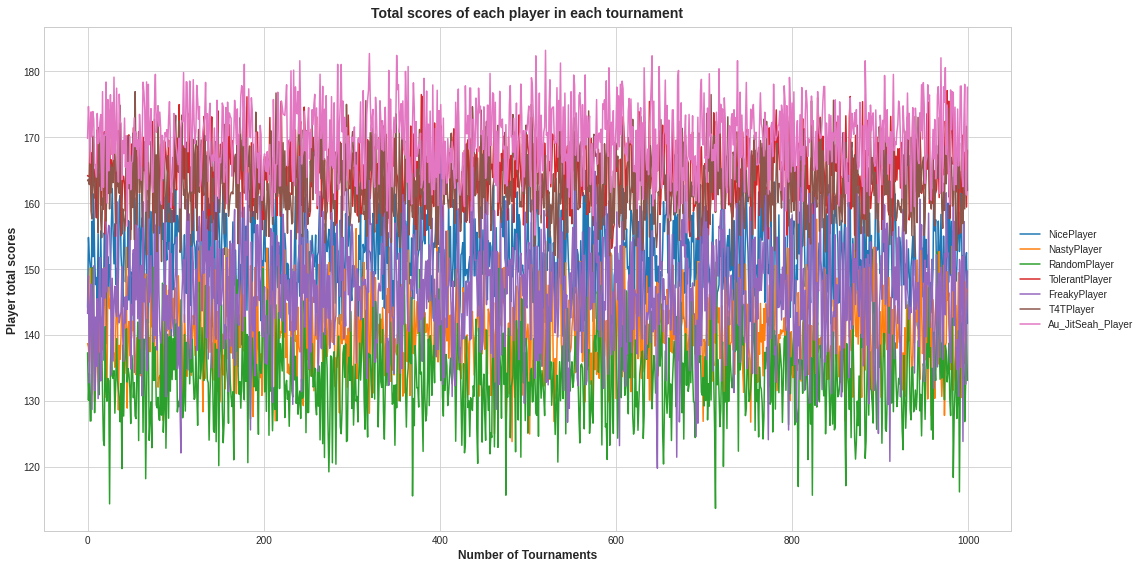

In [ ]:
plot_scores_vs_tournaments(res, save_file_name='3PD_Players_scores_tournaments')

In [ ]:
playerIndex = 3
print("Min total score for {} : {}".format(players_totalScores_df['Player_Type'][playerIndex],
                                           min(players_totalScores_df.iloc[playerIndex]['Scores'])))

print("Max total score for {} : {}".format(players_totalScores_df['Player_Type'][playerIndex],
                                           max(players_totalScores_df.iloc[playerIndex]['Scores'])))

Min total score for TolerantPlayer : 153.0970001220703
Max total score for TolerantPlayer : 177.00184631347656


In [ ]:
playerIndex = 5
print("Min total score for {} : {}".format(players_totalScores_df['Player_Type'][playerIndex],
                                           min(players_totalScores_df.iloc[playerIndex]['Scores'])))

print("Max total score for {} : {}".format(players_totalScores_df['Player_Type'][playerIndex],
                                           max(players_totalScores_df.iloc[playerIndex]['Scores'])))

Min total score for T4TPlayer : 150.44857788085938
Max total score for T4TPlayer : 176.840576171875


In [ ]:
playerIndex = 6
print("Min total score for {} : {}".format(players_totalScores_df['Player_Type'][playerIndex],
                                           min(players_totalScores_df.iloc[playerIndex]['Scores'])))

print("Max total score for {} : {}".format(players_totalScores_df['Player_Type'][playerIndex],
                                           max(players_totalScores_df.iloc[playerIndex]['Scores'])))

Min total score for Au_JitSeah_Player : 154.7107391357422
Max total score for Au_JitSeah_Player : 183.1096649169922


In [ ]:
# Dataframe from loading the generated "./3PD_RankCounts_7Players.csv" file
rankcounts

,Player_name,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,Rank_6,Rank_7
0,NicePlayer,3,14,70,555,306,49,3
1,NastyPlayer,0,0,0,49,247,517,187
2,RandomPlayer,0,0,0,5,66,240,689
3,TolerantPlayer,177,440,339,43,1,0,0
4,FreakyPlayer,1,4,27,273,380,194,121
5,T4TPlayer,142,321,468,69,0,0,0
6,Au_JitSeah_Player,677,221,96,6,0,0,0


In [ ]:
rankcounts['Player_name'][0]

'NicePlayer'

In [ ]:
rankcounts['Rank_1']

0      3
1      0
2      0
3    177
4      1
5    142
6    677
Name: Rank_1, dtype: int64

In [ ]:
def plot_rankcount_vs_player(dataframe, x: str, y: str, save_file_name=None):
    bar_text_filler = 0.1

    plt.figure(figsize=(25, 10))
    sns.set(color_codes=True)
    sns.set(font_scale = 1.5)
    ax = sns.barplot(x=x, y=y, data=dataframe)
    ax.set_title('Ranking counts of players', fontsize=20)

    position = 0
    for rectBox in ax.patches:
        count = rectBox.get_height() 
        total_counts = dataframe[y].sum()
        # print("Counts for {} in {} runs : {:.0f}".format(dataframe['Player_name'][position], total_counts, count))
        ax.text(rectBox.get_x() + rectBox.get_width()/2.,
                count + bar_text_filler,
                '{:1.2f}%'.format(count/total_counts*100), # get %
                ha="center", fontsize=16)
        position += 1

    if save_file_name is not None:
        plt.savefig(RESULTS_DIR_PATH + '/' + save_file_name)

    plt.show()

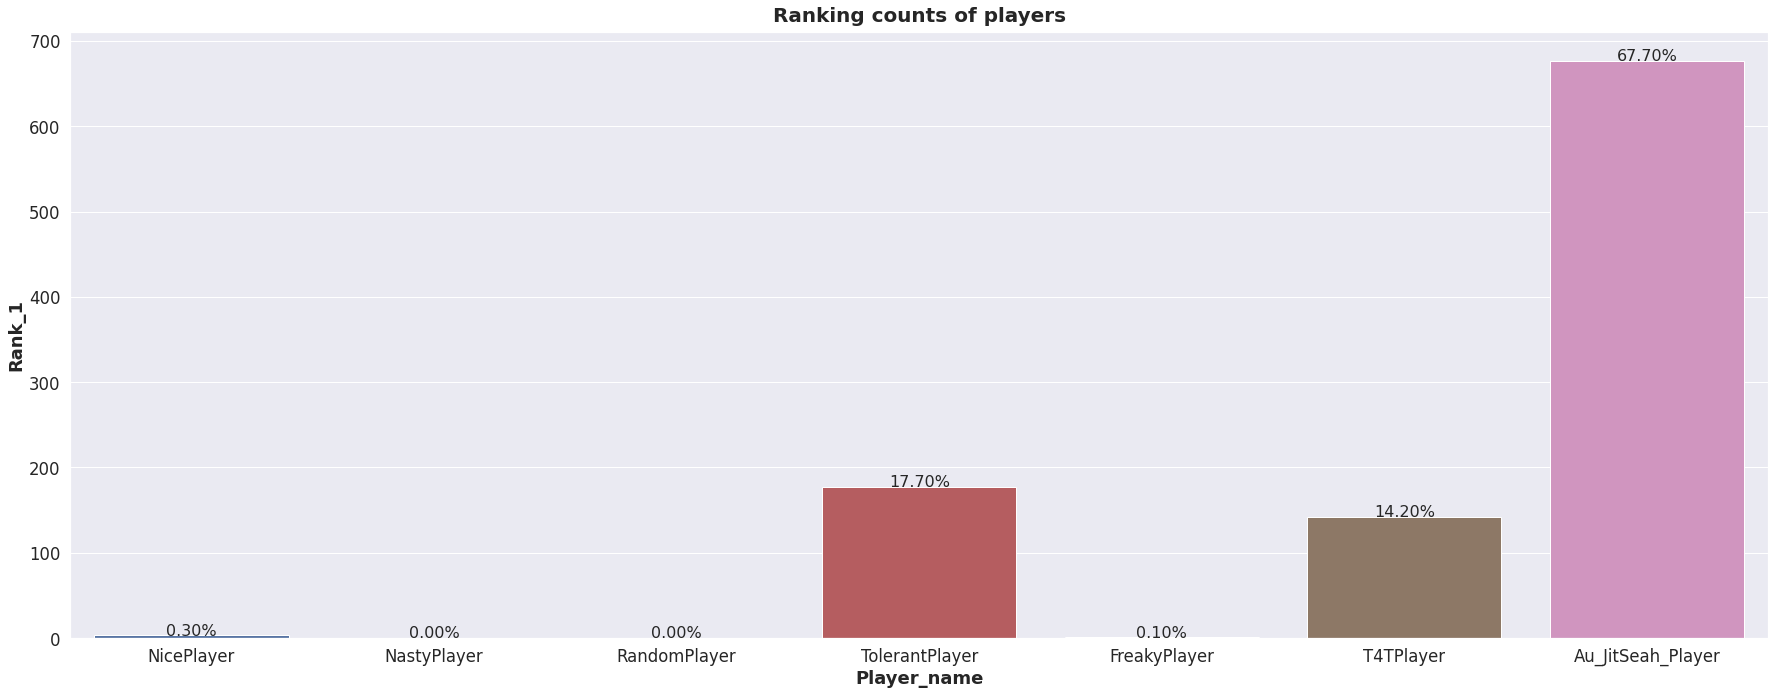

In [ ]:
plot_rankcount_vs_player(rankcounts, x='Player_name', y='Rank_1', save_file_name='Rank1_plot')

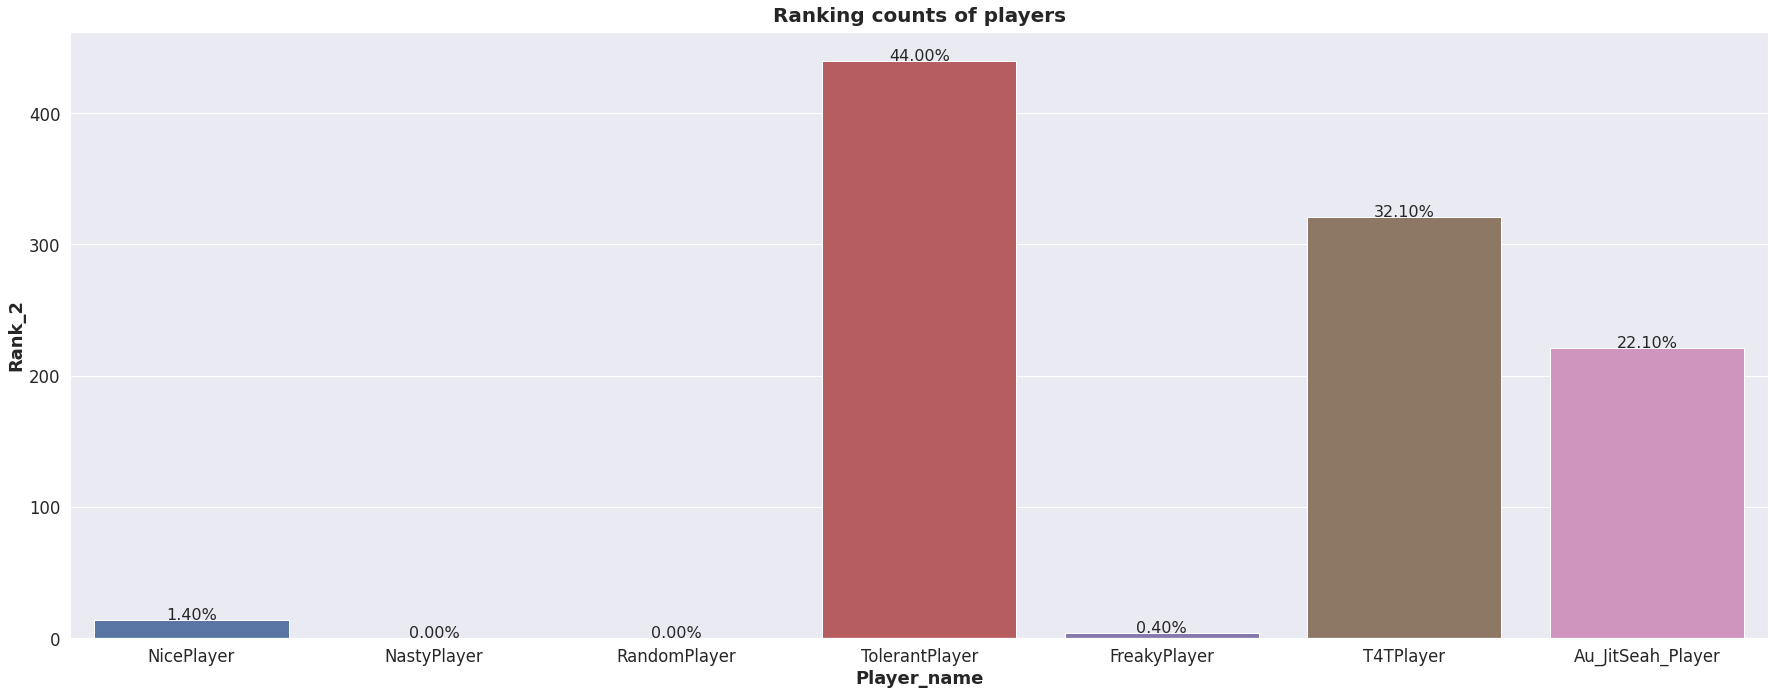

In [ ]:
plot_rankcount_vs_player(rankcounts, x='Player_name', y='Rank_2', save_file_name='Rank2_plot')

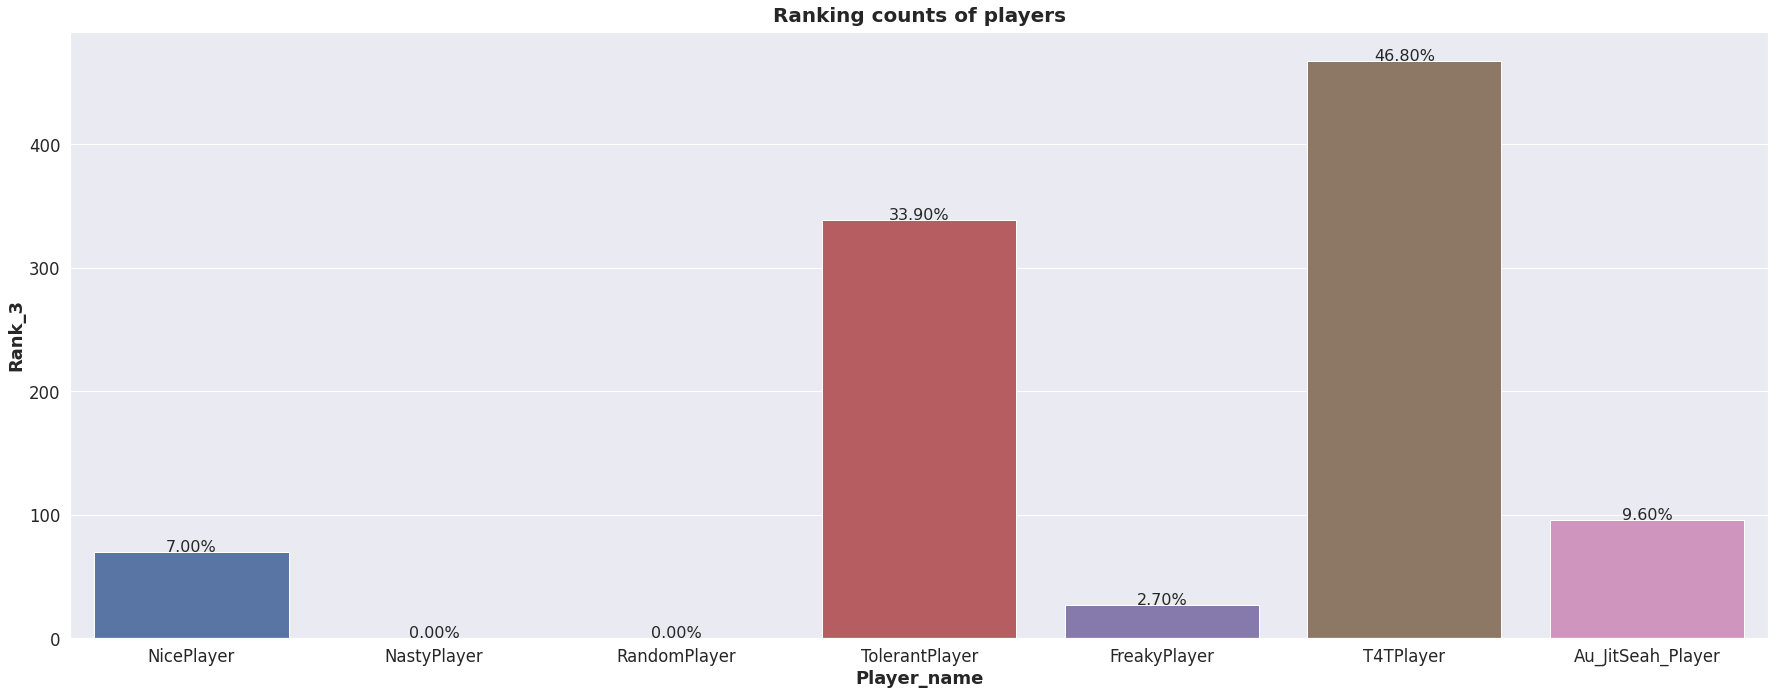

In [ ]:
plot_rankcount_vs_player(rankcounts, x='Player_name', y='Rank_3', save_file_name='Rank3_plot')

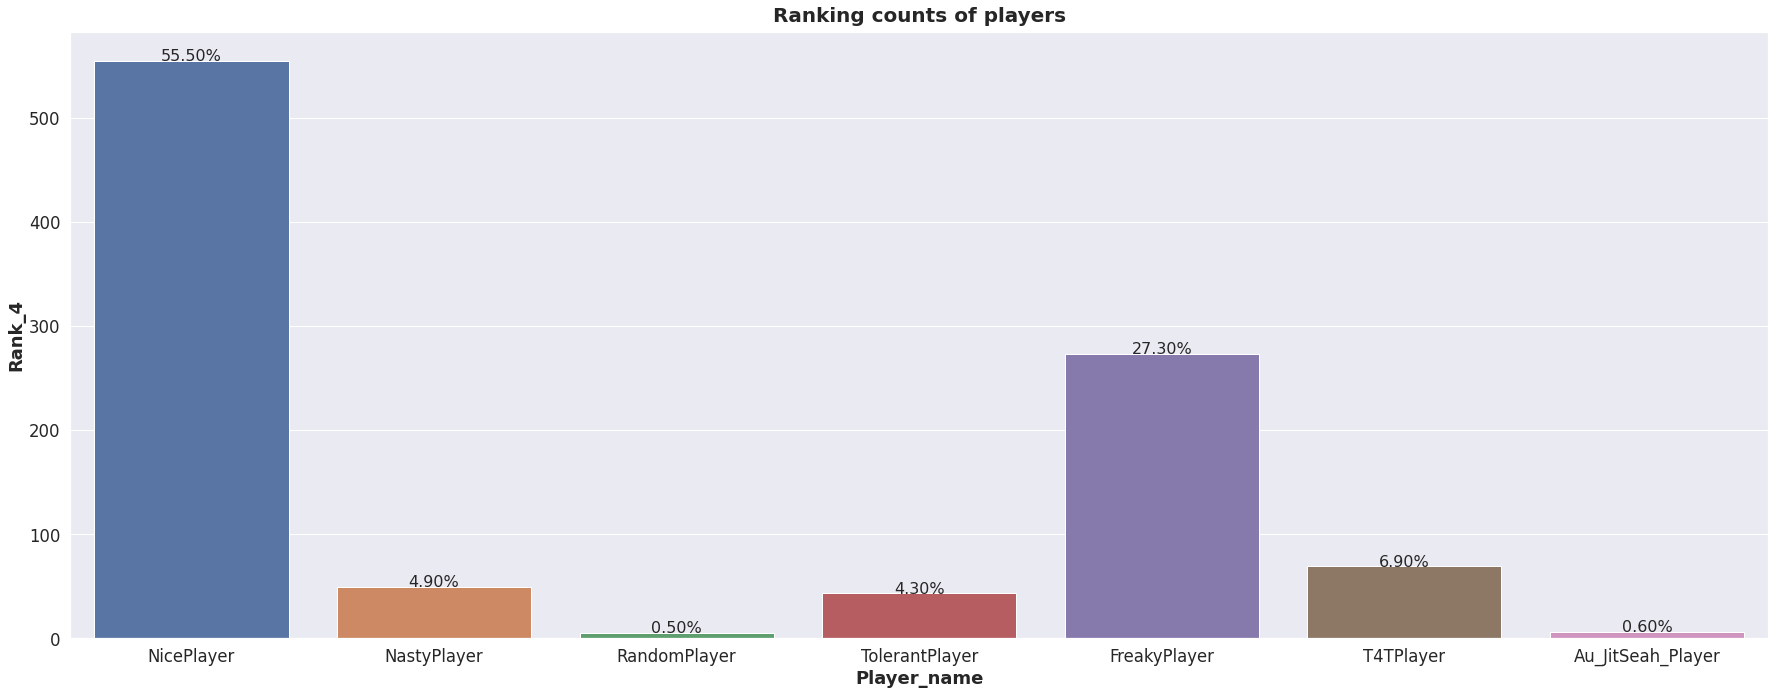

In [ ]:
plot_rankcount_vs_player(rankcounts, x='Player_name', y='Rank_4', save_file_name='Rank4_plot')

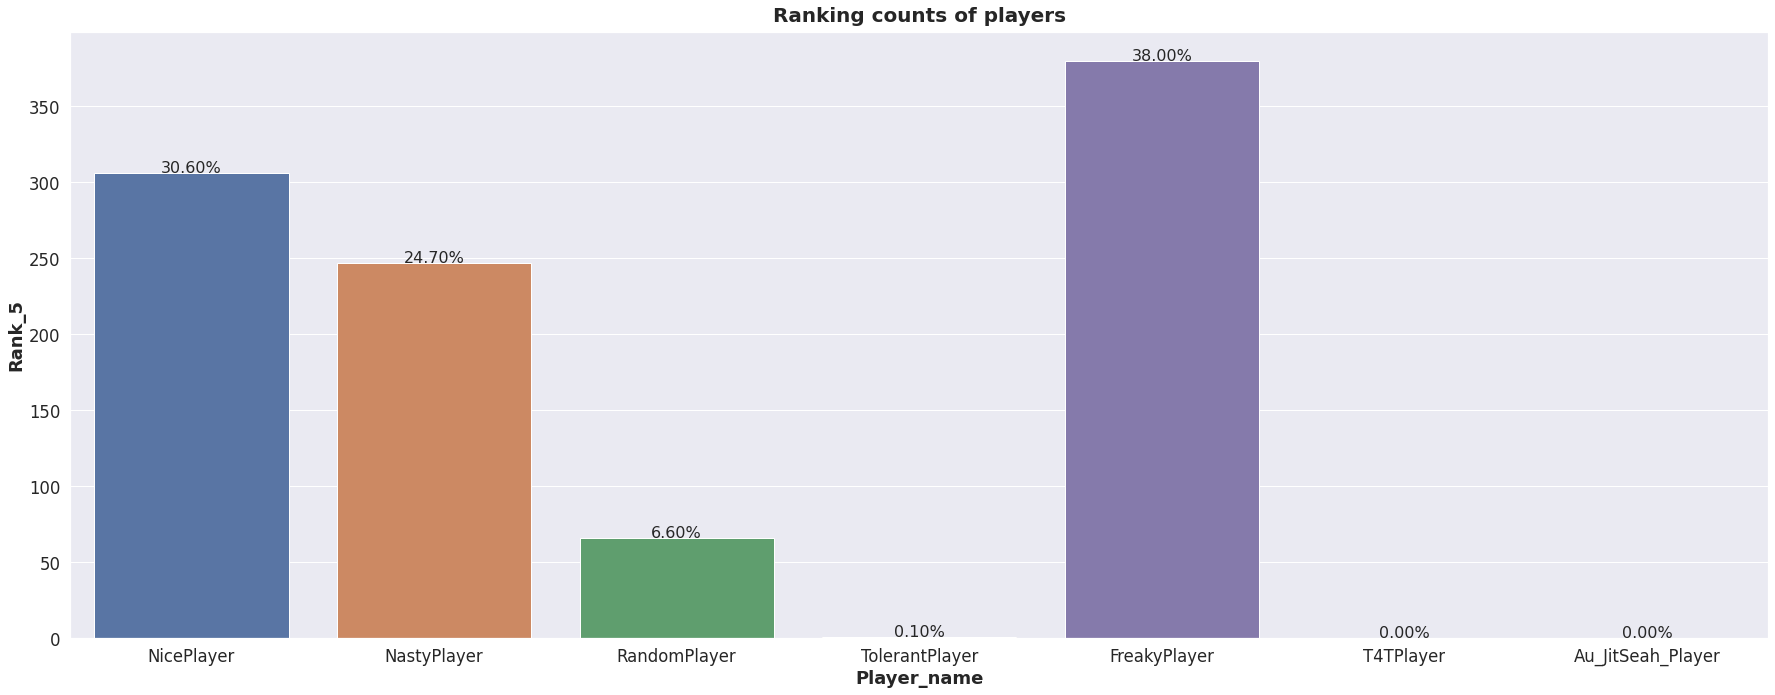

In [ ]:
plot_rankcount_vs_player(rankcounts, x='Player_name', y='Rank_5', save_file_name='Rank5_plot')

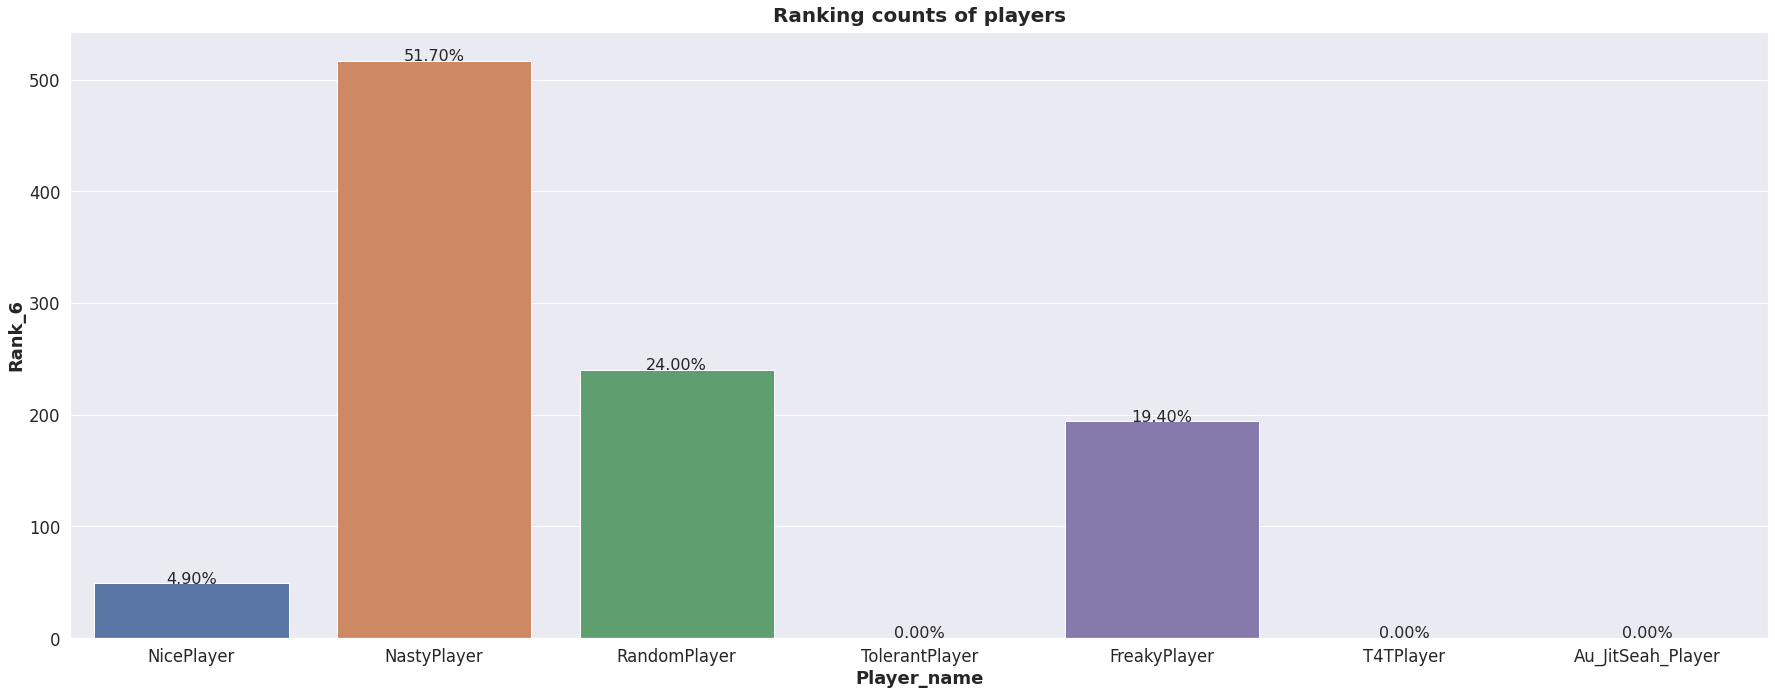

In [ ]:
plot_rankcount_vs_player(rankcounts, x='Player_name', y='Rank_6', save_file_name='Rank6_plot')

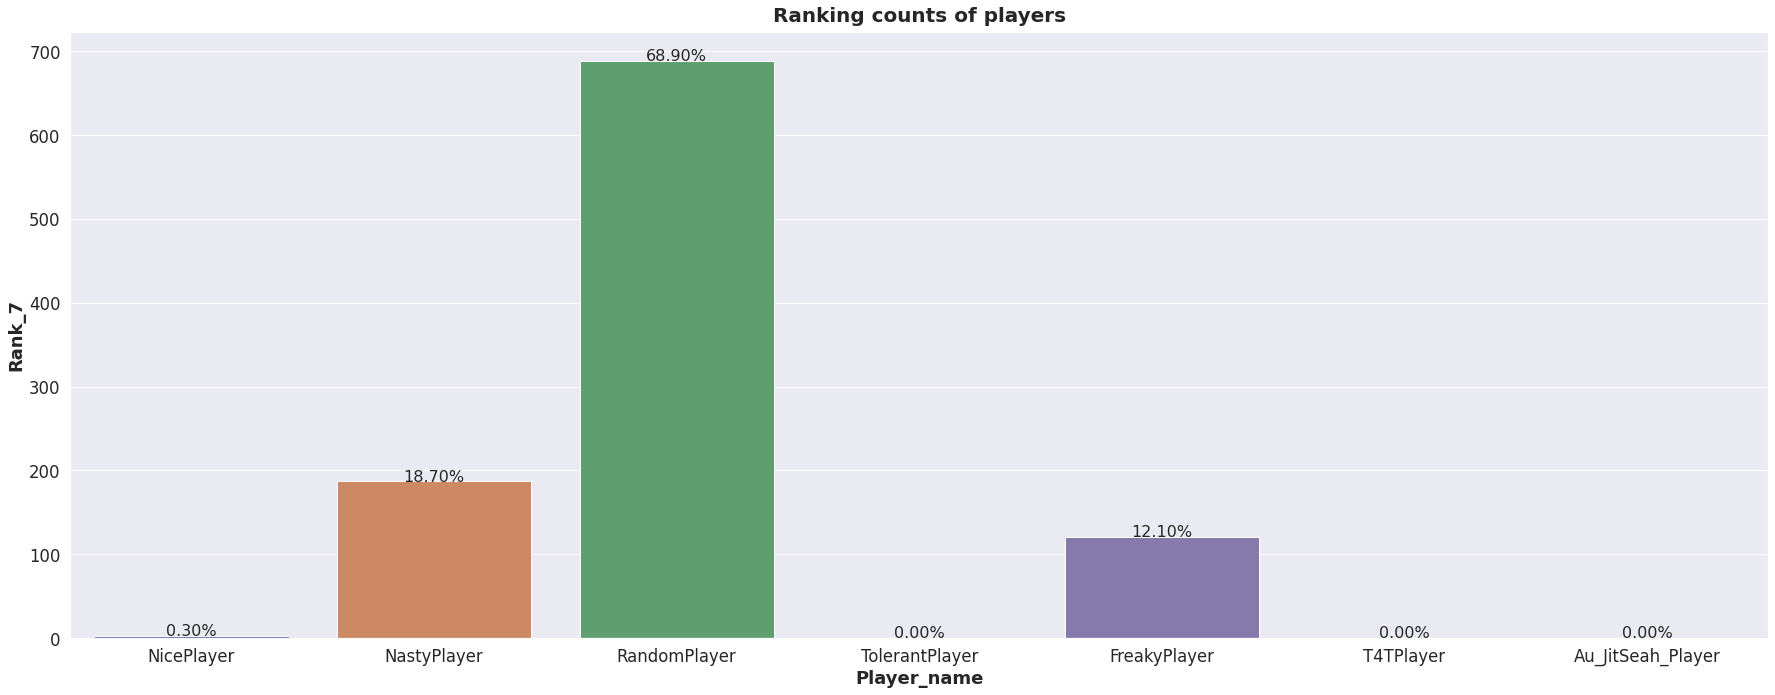

In [ ]:
plot_rankcount_vs_player(rankcounts, x='Player_name', y='Rank_7', save_file_name='Rank7_plot')